**Aim:
The ultimate goal of the project is to build a machine learning model that could find which futuristic of data is higher in means of sale** 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import scipy.stats as stats

In [6]:
df=pd.read_csv("Advertising Dataset (2).csv")

In [7]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [8]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [13]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [15]:
df.shape

(200, 5)

In [17]:
df.nunique()

Unnamed: 0    200
TV            190
Radio         167
Newspaper     172
Sales         121
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


**Checking data for its values,measures of central tendency and dispersion**

In [21]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [23]:
mean = df['TV'].mean()
median = df['TV'].median()
mode = statistics.mode(df['TV'])
print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)

Mean: 147.0425
Median: 149.75
Mode: 17.2


In [25]:
mean = df['Sales'].mean()
median = df['Sales'].median()
mode = statistics.mode(df['Sales'])
print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)

Mean: 14.0225
Median: 12.9
Mode: 9.7


In [27]:
range = df['Radio'].max() - df['Radio'].min()
variance = df['Radio'].var()
std_deviation = df['Radio'].std()
print("Range:", range)
print("Variance:", variance)
print("Standard Deviation:", std_deviation)

Range: 49.6
Variance: 220.4277427135678
Standard Deviation: 14.846809176168723


In [29]:
range = df['Newspaper'].max() - df['Newspaper'].min()
variance = df['Newspaper'].var()
std_deviation = df['Newspaper'].std()
print("Range:", range)
print("Variance:", variance)
print("Standard Deviation:", std_deviation)

Range: 113.7
Variance: 474.30832562814095
Standard Deviation: 21.778620838522833


In [31]:
data=df.dropna()

In [198]:
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


**Missing values in variables**


In [35]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values * 100) / df.shape[0]
print(missing_percentage)


Unnamed: 0    0.0
TV            0.0
Radio         0.0
Newspaper     0.0
Sales         0.0
dtype: float64


**Outlier Analysis**

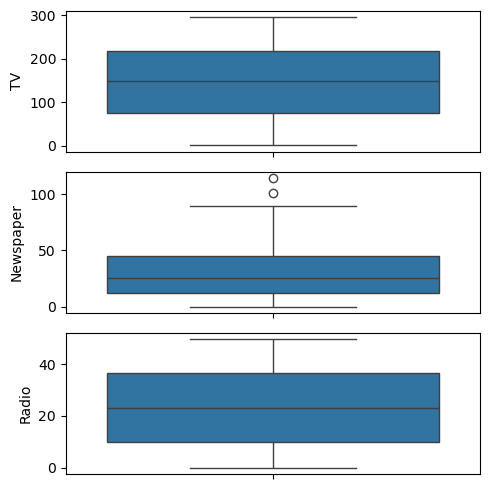

In [37]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()


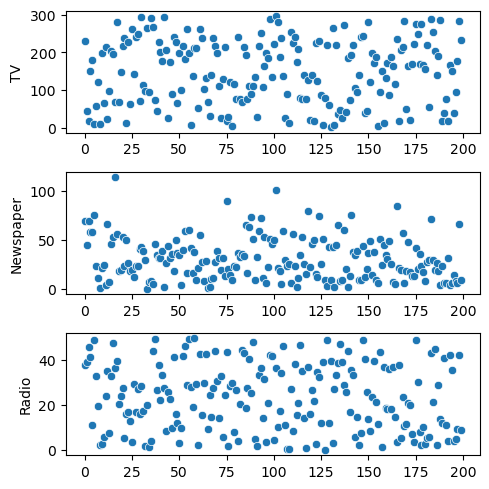

In [38]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.scatterplot(df['TV'], ax = axs[0])
plt2 = sns.scatterplot(df['Newspaper'], ax = axs[1])
plt3 = sns.scatterplot(df['Radio'], ax = axs[2])
plt.tight_layout()


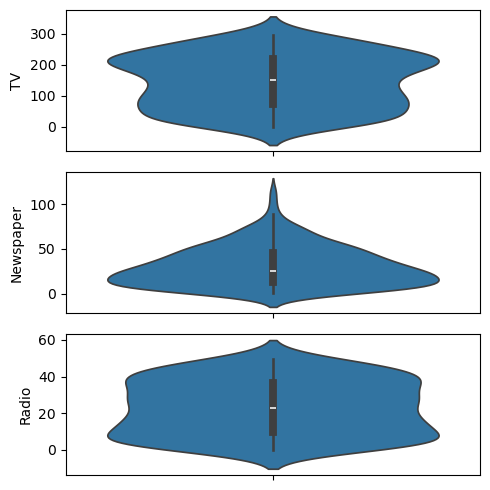

In [40]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.violinplot(df['TV'], ax = axs[0])
plt2 = sns.violinplot(df['Newspaper'], ax = axs[1])
plt3 = sns.violinplot(df['Radio'], ax = axs[2])
plt.tight_layout()

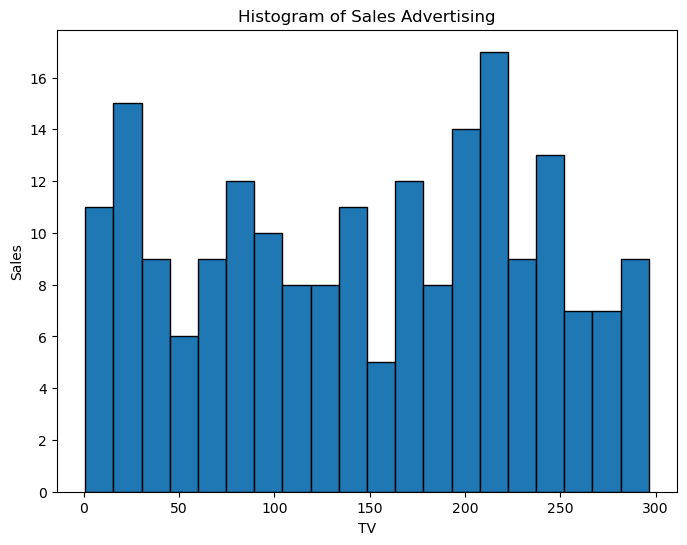

In [42]:
# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.hist(df['TV'], bins=20, edgecolor='black')
plt.title('Histogram of Sales Advertising')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()


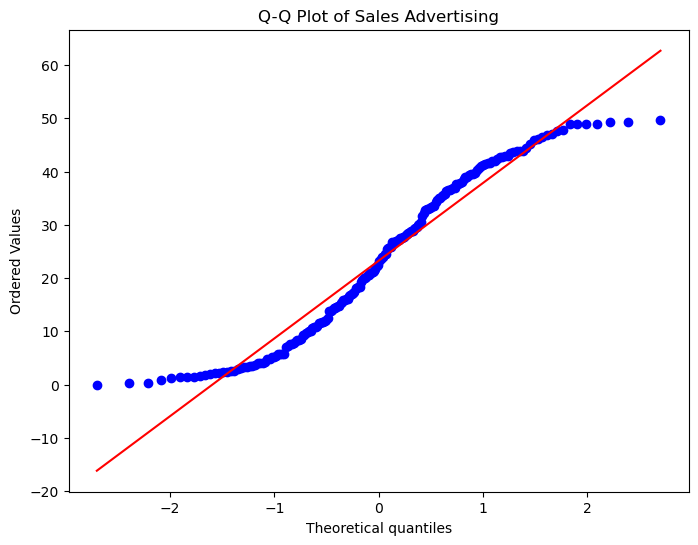

In [44]:
plt.figure(figsize=(8, 6))
stats.probplot(df['Radio'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Sales Advertising')
plt.show()


**Univariate Analysis**

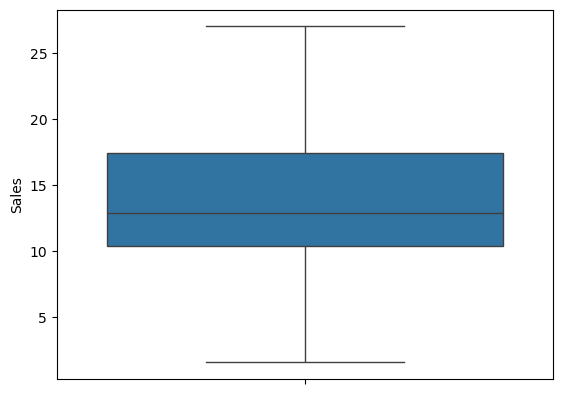

In [48]:
sns.boxplot(df['Sales'])
plt.show()

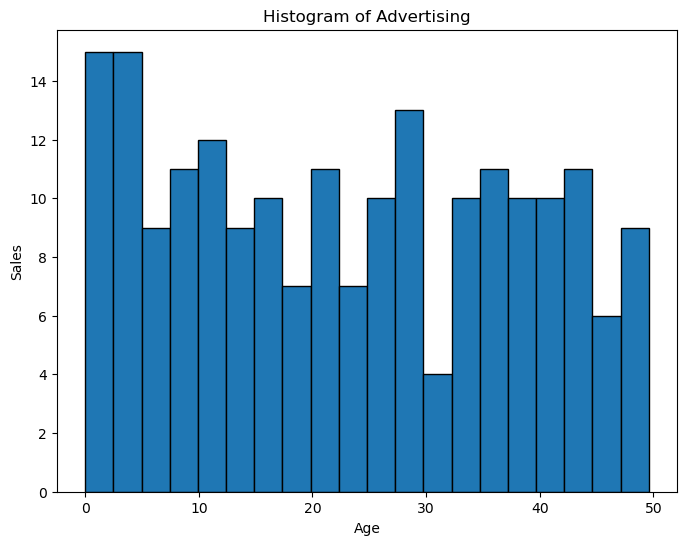

In [50]:
plt.figure(figsize=(8, 6))
plt.hist(df['Radio'], bins=20, edgecolor='black')
plt.title('Histogram of Advertising')
plt.xlabel('Age')
plt.ylabel('Sales')
plt.show()


**Bivariate Analysis**

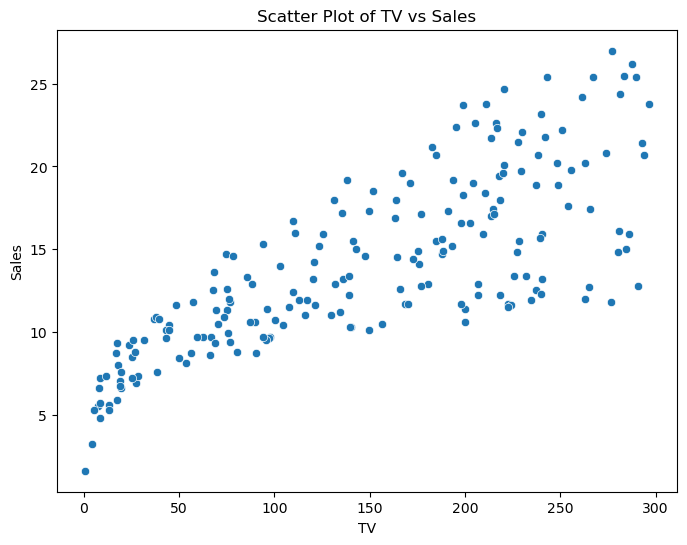

In [53]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TV', y='Sales', data=df)
plt.title('Scatter Plot of TV vs Sales')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()


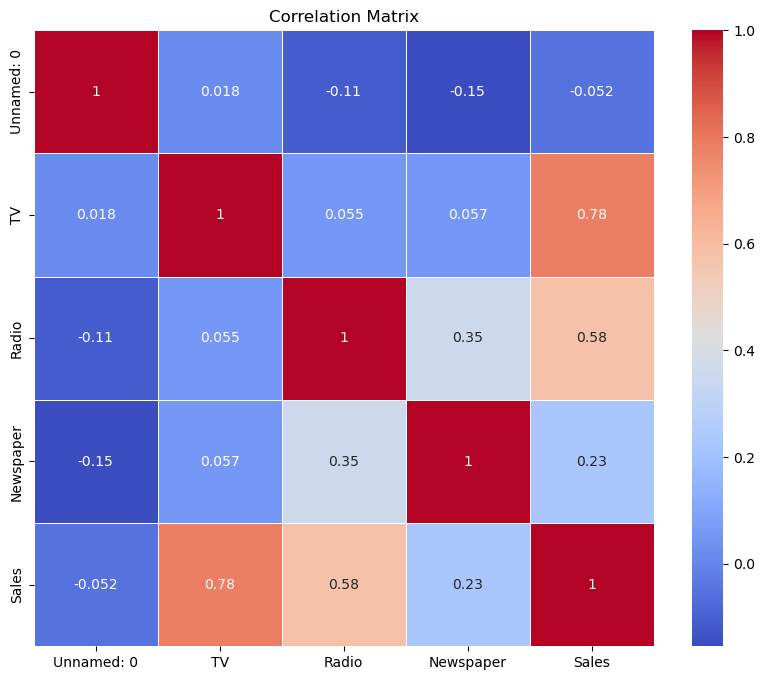

In [55]:
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


**Multi Variate Analysis**

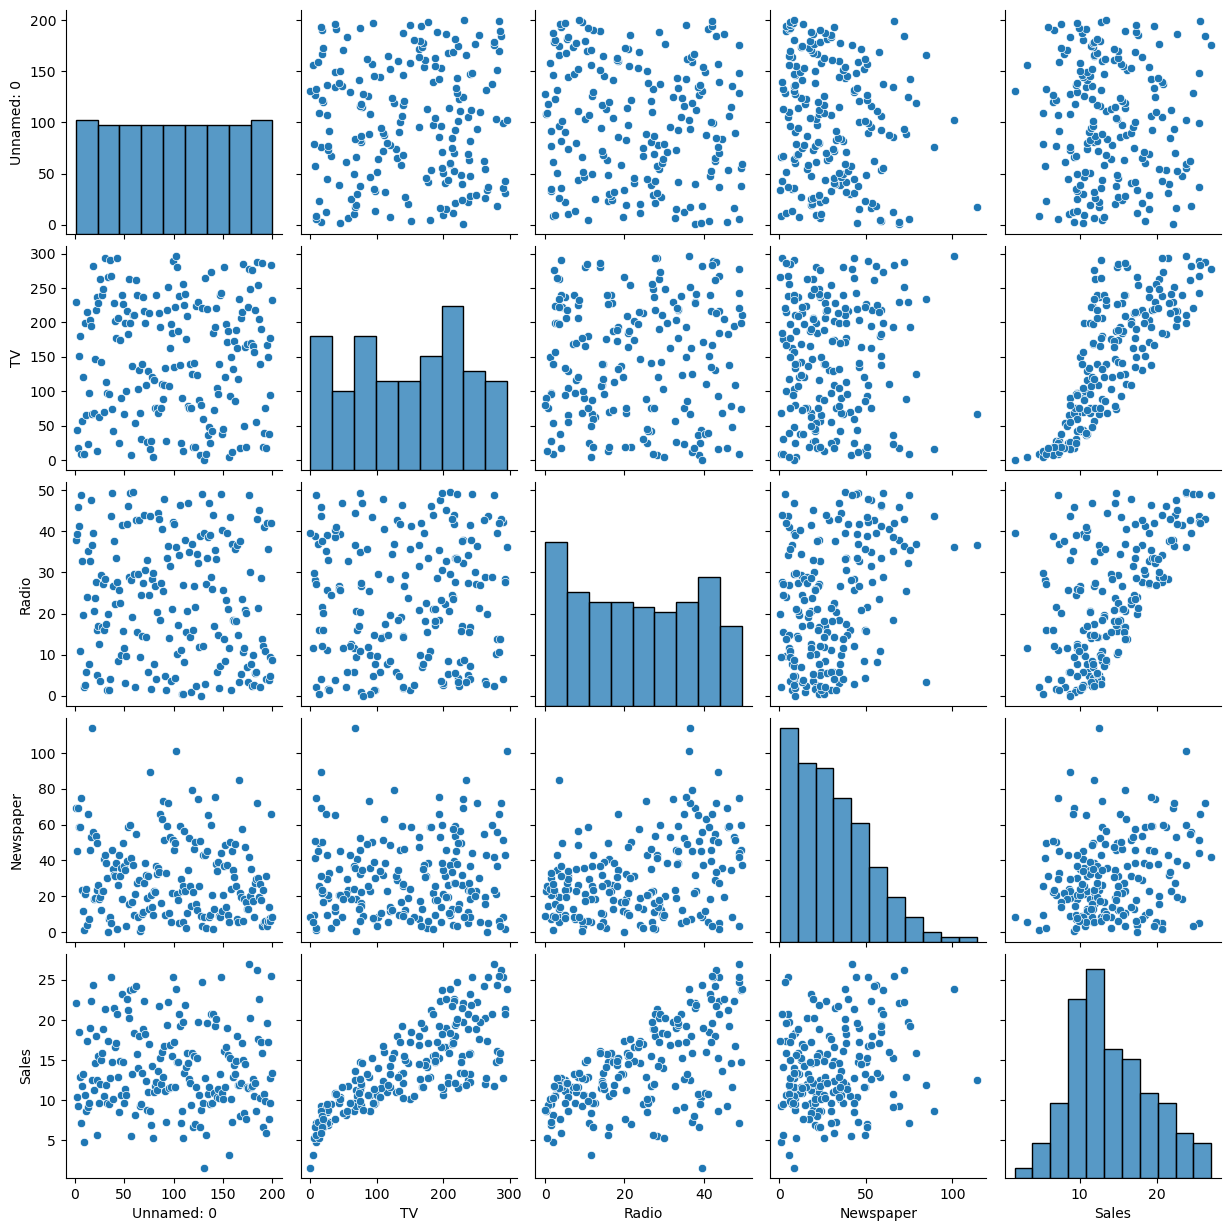

In [58]:
sns.pairplot(df)
plt.show()

**Checking for Outliers**

In [60]:
from scipy import stats
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
print(np.where(z_scores > 3)) 


(array([ 16, 101], dtype=int64), array([3, 3], dtype=int64))


**Handling Categorical Variables**

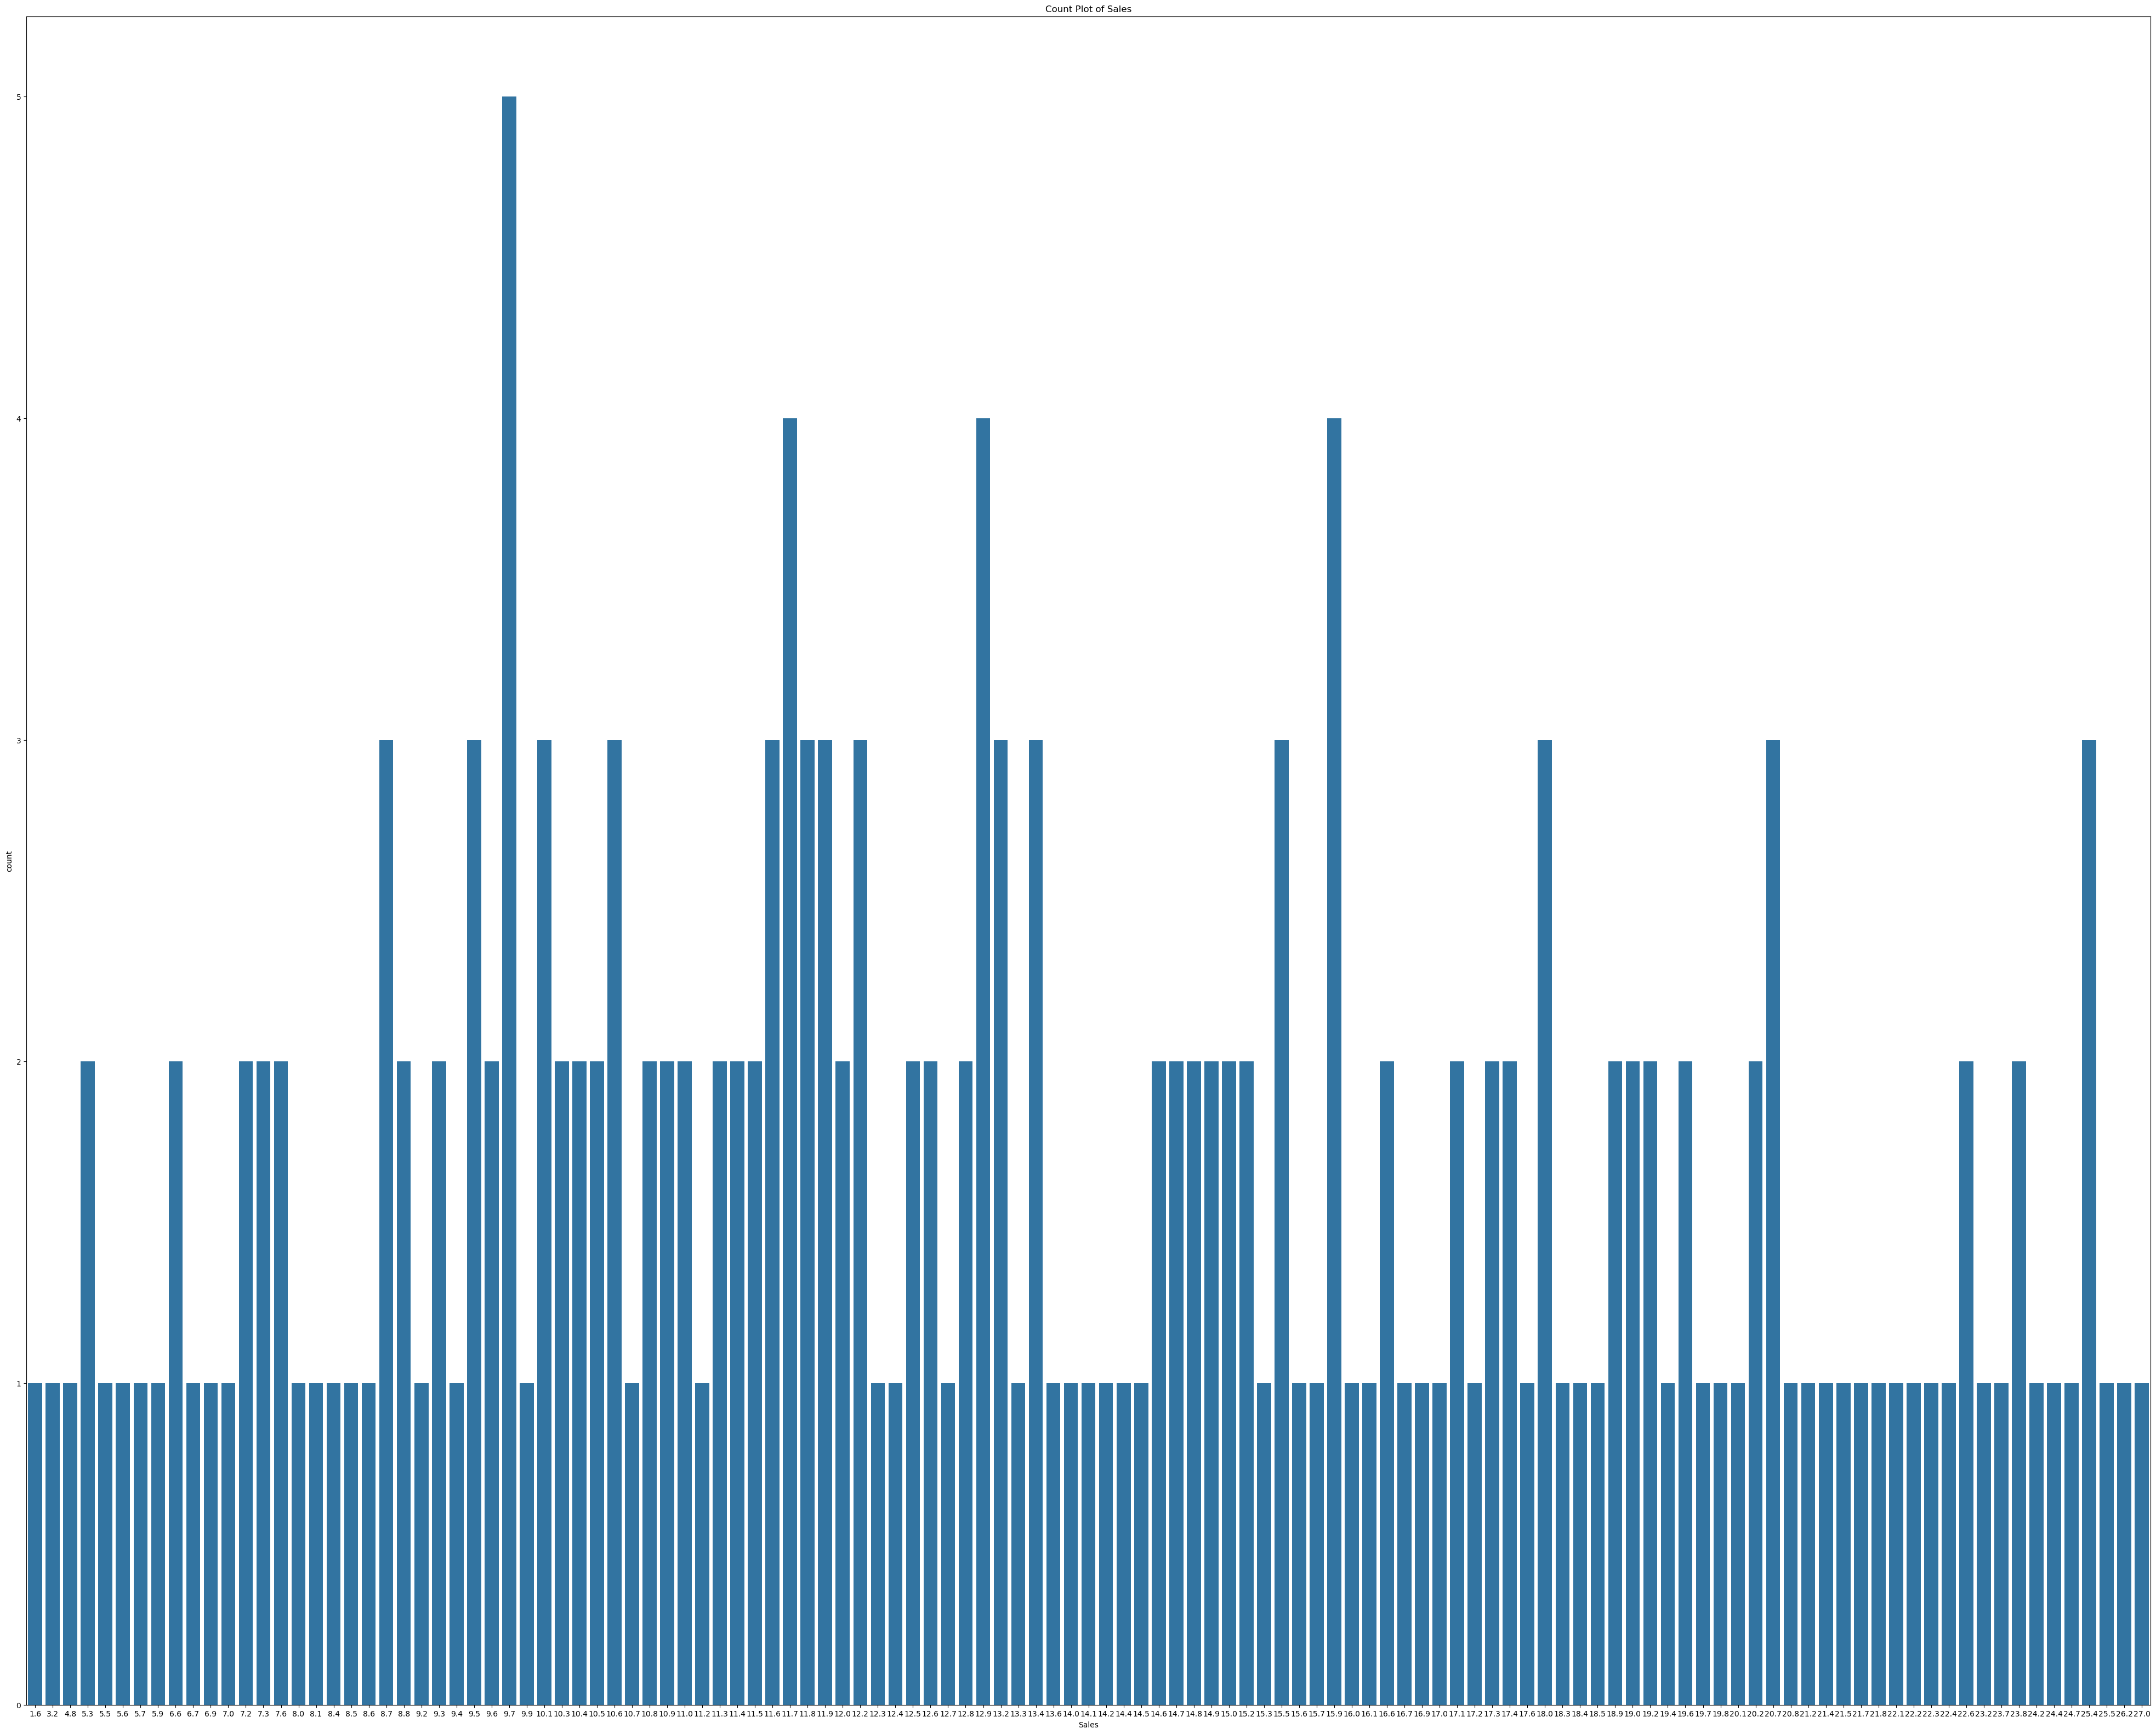

In [62]:
plt.figure(figsize=(50, 40))
sns.countplot(x='Sales', data=df)
plt.title('Count Plot of Sales')
plt.show()


**Saved the Cleaned Data**

In [64]:
df.to_csv('Advertising Dataset (2).csv', index=False)


**Model Building**


In [1]:
X = df['Radio']
y = df['Sales']

NameError: name 'df' is not defined

**Train Test Split**

In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [147]:
X_train.head()


74     24.6
3      41.3
185    45.1
26     29.3
90      4.9
Name: Radio, dtype: float64

In [149]:
y_train.head()


74     17.0
3      18.5
185    22.6
26     15.0
90     11.2
Name: Sales, dtype: float64

**Building a Linear Model**

In [152]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [154]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

In [156]:
lr.params

const    9.247973
Radio    0.201073
dtype: float64

In [158]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     60.51
Date:                Tue, 27 Aug 2024   Prob (F-statistic):           1.54e-12
Time:                        11:27:06   Log-Likelihood:                -411.70
No. Observations:                 140   AIC:                             827.4
Df Residuals:                     138   BIC:                             833.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.2480      0.709     13.036      0.0

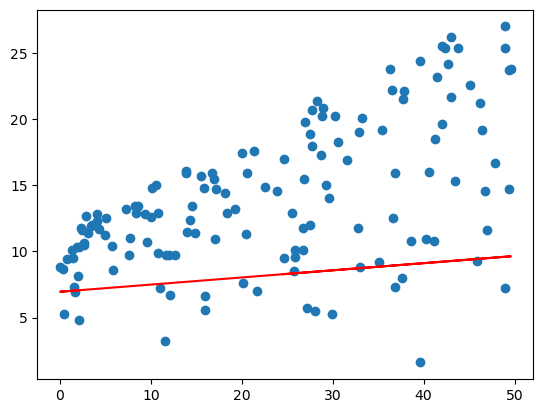

In [160]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

**Model Evaluation**

In [163]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

C:\Users\Sankar\AppData\Local\Temp\ipykernel_8908\3587456112.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


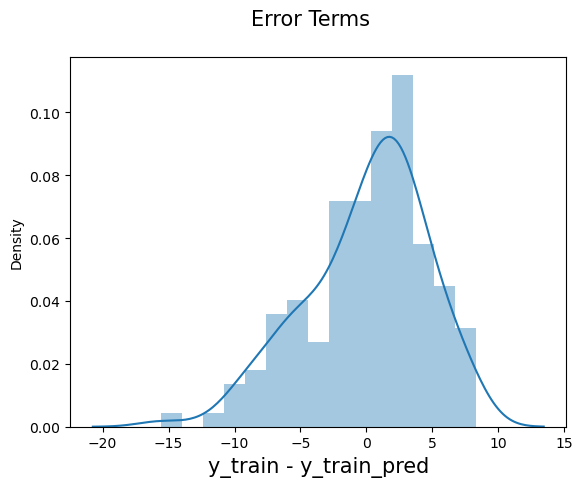

In [165]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  
plt.xlabel('y_train - y_train_pred', fontsize = 15)         
plt.show()

**Predictions on a Test set**

In [168]:
X_test_sm = sm.add_constant(X_test)
y_pred = lr.predict(X_test_sm)

In [170]:
y_pred.head()

126    17.069710
104    16.144774
99     17.632714
92     15.983916
111    16.888744
dtype: float64

In [172]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

**Mean Squared Error**

In [174]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')


Mean Squared Error: 11.39
R^2 Score: 0.42


**RMSE**

In [176]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Root Mean Squared Error (RMSE): 3.37


**R-Squared**

In [178]:
r_squared = r2_score(y_test, y_pred)
print(f'R-squared value: {r_squared:.2f}')

R-squared value: 0.42


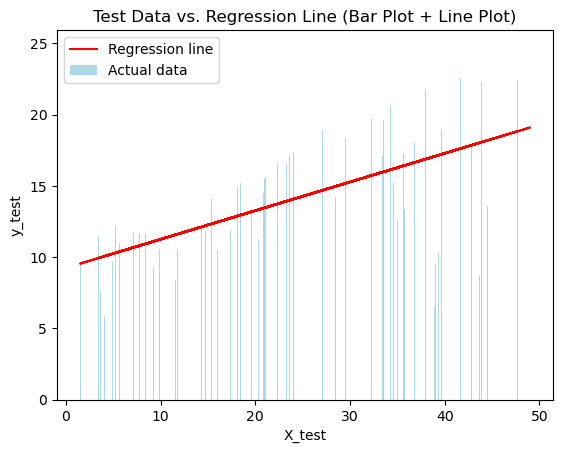

In [188]:
X_test_flat = np.array(X_test).flatten()
plt.bar(X_test_flat, y_test, color='lightblue', label='Actual data', width=0.1)
plt.plot(X_test_flat, 9.247973 + 0.201073 * X_test_flat, color='red', label='Regression line')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.title('Test Data vs. Regression Line (Bar Plot + Line Plot)')
plt.legend()
plt.show()

**Visualize fit on Test set**

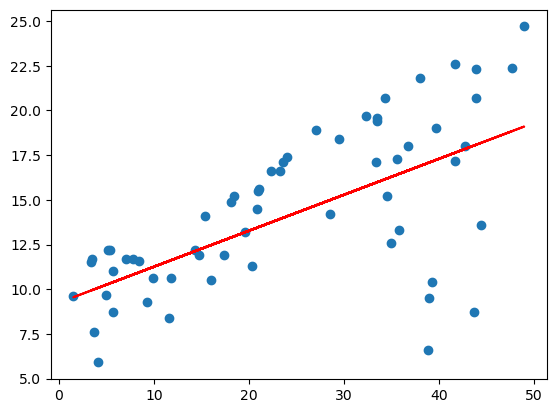

In [190]:
plt.scatter(X_test, y_test)
plt.plot(X_test,  9.247973 + 0.201073 * X_test, 'r')
plt.show()